# CPSC 103 Poster by:
## 1) Sidharth Grover (36181949)
## 2) Akshat Singla (33275280)

# Checking The Compatibility of Songs from 1924 to 2010 for the production of a Mashup with the Song Input


## Input 

The file songs.csv contains many rows with information about songs from the year 1924 to 2010
. Each row contains the following:
- Title 
- Artist 
- Year
- Popularity
- Duration (in seconds)
- Tempo (in beats per minute(bpm))

My program would be reading only the 'Title' , 'Year' and 'Tempo' for every song in the songs.csv file.

## Output

I would be representing the data of the mashup compatible songs in the form of a line graph which shows the number of songs in each year that can be used to produce a mashup with the song that is input.

Graph/Chart :  Type: Line Graph
 
This would help me in comparing the songs in different tempo ranges and representing the number of songs from every year which have a tempo in the range [BPM - 25, BPM + 25], where BPM is the tempo of the song that has been input.

- The X Axis of the Line Chart would have the years from 1924 to 2010
- The Y Axis of the Line Chart would have the number of Compatible Songs which have their Tempo in the range     mentioned above.
- The Title of the Line Chart is "Total Number of Songs Compatible with " + song_title + " Per Year"

## What problem am I solving?

I want to make a mashup of 2 songs. For this, I would require 2 songs that are actually compatible with each other for the production of a mashup i.e both songs have similar tempos( in the range [bpm - 25, bpm + 25]).

The csv file gives me all the songs from 1924 to 2010. Using my code would give me an overview of the variation in the compatibility of songs from 1924 to 2010 with the song that I'm interested in. This way it'll get easier for me to look for a compatible song.

## Where is the information from?

The songs.csv is sourced from http://millionsongdataset.com

The Million Song Dataset is a freely-available collection of audio features and metadata for a million contemporary popular music tracks.

The core of the dataset is the feature analysis and metadata for one million songs, provided by The Echo Nest. 

## Why is it interesting to me?




The information I chose to represent from SongData are the Song Title, Year, and the tempo. Firstly there would be formation of a filtered list of songs that contains all the SongDatas that are compatible with the SongData that has the same title as the song_title input. Then, there would be a comparision of the tempo of the SongData input with each SongData in the filtered list. The result would be a line chart with the number of compatible songs (Y axis value) and the years (X axis). This would show the variation in the number of songs from 1924 to 2010 compatible to produce a mashup with the song input.

In the past I have worked with different music production softwares and it is always difficult to find songs to make mashups with. This code would definitely help solve that problem by making it easier to find compatible songs.


## Describe how you solved the problem. Provide visuals if possible, and definitely provide the graph or chart(s) that your program created.

My project is based on a Step by Step systematic program design method.
There are a lot of steps involved in producing the desired output.

### Step 1: The Data Definition:
I chose to define 2 data definitions: 
- Compound- SongData with a title, year ,and tempo.
- List of SongData 

In [2]:
from cs103 import *
from typing import NamedTuple
from typing import List
import csv

        
SongData = NamedTuple("SongData", [('title', str),
                                   ('year', int),       # in range[1924-2010]
                                   ('tempo', float)])   # in bpm in range[0, ...)

# interp. Song data from 1924 to 2010 that includes the song title ('title'), 
# the year, and the tempo ('tempo') in bpm.

SILENTNIGHT = SongData("Silent Night",
                       2003,
                       87.002)
ANTARTICQUE = SongData("L'antarctique",
                       2007,
                       62.294)
 
SURFACE = SongData("On the Surface",
                   2005,
                   135.598)

MAUVAIS = SongData("Le mauvais coton",
                   1990,
                   164.452)

GNOSTALGIA = SongData("Gnostalgia",
                      2000,
                      124.824)

BRITANNIA = SongData("Britannia",
                     2009,
                     123.958)
 
BATTERY = SongData("Battery",
                   2007,
                   130.019)

BABY = SongData("White Baby",
                2010,
                134.899)
BORDERLINE = SongData("If I Get to the Borderline",
                      2008,
                      65.13)
KNOW = SongData("Do You Know",
                2001,
                85.202)

# template based on compound
@typecheck
def fn_for_song_data(sd: SongData) -> ...:
    return ...(sd.title,
               sd.year,
               sd.tempo)

# List[SongData]
# interp. a list of Songs

L0 = []
L1 = [SILENTNIGHT,
      ANTARTICQUE,
      SURFACE,
      MAUVAIS,
      GNOSTALGIA,
      BRITANNIA,
      BATTERY,
      BABY,
      BORDERLINE,
      KNOW]

# template based on arbitrary-sized and the reference rule
@typecheck
def fn_for_losd(losd: List[SongData]) -> ...:
    # description of the acc
    acc = ... # type: ...
    for sd in losd:
        acc = ...(acc, fn_for_song_data(sd))
    return ...(acc)

### Step 2: Reading the information from the csv file and forming a list of all the SongDatas in it

In [3]:
@typecheck
def read(filename: str) -> List[SongData]:
    """    
    reads information from the specified file and returns and returns a list of Song Data
    """
    #return []  #stub
    # Template from HtDAP
    
    # losd contains the result so far
    losd = [] # type: List[SongData]

    with open(filename) as csvfile:

        reader = csv.reader(csvfile, delimiter=',')
        next(reader) # skip header line

        for row in reader:
            # you may not need to store all the rows, and you may need
            # to convert some of the strings to other types
            sd = SongData(row[0],parse_int(row[2]),parse_float(row[5]))
            losd.append(sd)

    return losd

### Step 3: Checking if the song_title that is input actually has a corresponding SongData in the List[SongData] returned by the read function using the csv file that is input.

In [4]:
@typecheck
def check_songdata_existence(losd: List[SongData], song_title: str) -> bool:
    """
    Returns True if there exists a SongData in the list with the song title same as song_title, 
    False Otherwise
    
    """
    #return False #stub
    #Template based on List[SongData] along with an additional parameter
    
    count = 0 #type: int
    for sd in losd:
        if check_title(sd,song_title):
            count = count + 1
            
    return check_count(count)
            
@typecheck
def check_count(count1: int) -> bool:
    """
    Returns True if count is equal to one, False otherwise
    """
    #return True #stub
    #return...(count) #template
    if (count1 == 1):
        return True
    else:
        return False

### Step 4: If the SongData actually exists in the List of SongData, finding the SongData using the SongData.title (song_title) that is input in the main function.

In [5]:
@typecheck
def extract_songdata(losd: List[SongData], song_title: str) -> SongData:
    """
    Takes in a song title and a list of Songs, Compares the song title with the SongDta from the list
    and then returns its SongData   
    """

    #return SongData("L'antarctique", 2007, 62.294) #stub
    #Template based on List[SongData] along with an additional parameter
    
    for sd in losd:
        if check_title(sd,song_title):
            return sd
                
@typecheck                
def check_title(sd: SongData, song_title: str) -> bool:
    """
    Returns True if the 2 song titles input are same, False Otherwise
    """
    
    #return True #stub
    #Template based on SongData with an additional parameter
    
    if same_song_title(sd.title, song_title):
        return True
    else:
        return False
    
    
    
    
@typecheck    
def same_song_title(songtitle1: str, songtitle2: str) -> bool:
    """
    Returns True if the 2 song titles input are same, False Otherwise
    """
        
    #return False #stub
    #return ...(songtitle1,songtitle2) #Template
    
    if (songtitle1 == songtitle2):
        return True
    else:
        return False

### Step 5: Formation of a filtered list with the SongDatas that are actually compatible with the input SongData
I did this by comparing the tempos of the SongDatas in the list individually with the tempo of the input SongData.

In [6]:
@typecheck
def compatible_song_data(losd: List[SongData], song_title: str) -> List[SongData]:
    """
    Takes in a list of SongDatas and a string(song_title), filters out all the SongDatas incompatible with 
    the SongData with the title song_title. Returns a list of compatible SongDatas.
    
    """

    #return [] #type: List[SongData]
    #Template from List[SongData] with an additional parameter
    
    #locs is the list of all the songdata that are compatible with the song that is input
    locs = [] #type: List[SongData]
    
    input_songdata = extract_songdata(losd, song_title)
    
    for sd in losd:
        if compare_song_datas(sd, input_songdata):
            locs.append(sd)
    
    return locs

@typecheck
def compare_song_datas(sd1: SongData, sd2: SongData)-> bool:
    """
    returns True if there is a difference of 25 or less between the tempos of the two input songdatas
    """
    #return True #stub
    #Template based on SongData(twice)
    if compare_song_bpm(sd1.tempo, sd2.tempo):
        return True
    else:
        return False
    

    
@typecheck
def compare_song_bpm(bpm1: float, bpm2: float)-> bool:
    """
    returns True if there is a difference of 25 or less between the two given tempos
    """
    #return True #stub
    #return...(bpm1, bpm2) #template
    
    if abs(bpm2 - bpm1) <= 25:
        return True
    else:
        return False

### Step 6: Formation of a list of the count of compatible songs in each year from 1924 till 2010 in the filtered list which was  created in the last step.

In [13]:
@typecheck
def count_compatible_songs(locs: List[SongData]) -> List[int]:
    """
    Takes in a list of SongDatas and returns a list of integers consisting of the nymber of compatible
    songs in each year from 1924 to 2010
    
    """
    
    #return [] #stub
    #Template based on List[SongData]
    
    year_list = get_year_list(1924,2010)
    loc = [] #Type: List[int]
    for year in year_list:
        loc.append(count_compatible_songs_by_year(locs, year))
    return loc

@typecheck
def count_compatible_songs_by_year(locs: List[SongData], year: int) -> int:
    """
    Takes in a list of SongDatas and an integer(year). Returns the number of elements(SongDatas) in the 
    list with the same year as the input year
    
    """
    
    #return 0 #stub
    #Template based on List[SongData] along with an additional parameter
    count = 0 #type: int
    for s in locs:
        if check_year(s,year):
            count = count + 1
            
    return count
    
@typecheck
def check_year(sd: SongData, year: int) -> bool:
    """
    Takes in an year and a SongData, compares the year with the year of the SongData,
    and returns True if both the years are same, False Otherwise
    """
    #return True #stub
    #Template based on SongData(Compound) with an additional parameter
    if (compare_year(sd.year,year)):
        return True
    else:
        return False


    
    
@typecheck
def compare_year(year1: int, year2: int) -> bool:
    """
    Takes in 2 years, compares them and returns True if both are equal, False Otherwise
    """
    #return True #stub
    #return ...(year1, year2) #Template
    
    if (year1 == year2):
        return True
    else:
        return False


### Step 6 (Helper): The Functions above use a very small function to get a list of all years from 1924 to 2010

In [8]:
@typecheck
def get_year_list(start: int, stop: int) -> List[int]:
    """
    
    """
    #return [] #stub
    #return ...(start,stop) #Template
    year_list = [] #type: List[int]
    for y in range(start, stop+1):
        year_list.append(y)
    return year_list

### Step 7: The main function
There is a condition imposed in the main function. It checks if the song_title actually has a correspodind SongData in the list formed from the csv file.

if (check_songdata_existence(read(filename), song_title) returns True
    That means that the song exists and we can plot the normal graph using the function  plot_compatible_songs_per_year()
else 
    The song actually doesn't exist in the list and we can just plot an empty graph with plot_empty_graph()

In [12]:
@typecheck
def main(filename: str, song_title: str) -> None:
    """
    Reads the file from given filename, displays a line chart of the 
    number of songs compatible (on Y-axis) per year (on X-axis) for a particular song that is input,
    and returns None
    
    """
    # Template from HtDAP, based on composition
    if (check_songdata_existence(read(filename), song_title) == False):
        return plot_empty_graph(song_title)
    else:
        return plot_compatible_songs_per_year(read(filename), song_title)


### Step 8: Explaining the Plot Functions

1.plot_compatible_songs_per_year()
Inside the function, there's a formation of 2 lists: 
- A list for the Y Axis Values- List of Count of the Compatible songs from 1924 to 2010.
  (Using compatible_song_data() and count_compatible_songs())
- A list for the X Axis Values- List of Years from 1924 to 2010
  (Using get_year_list(1924,2010))
  
 The function plots the graph using the 2 lists: pyplot.plot(year_list, num_songs_compatible)
 
2.plot_empty_graph()
Inside the function, there is a formation of 2 lists:
- A list for the X Axis Values- List of Years from 1924 to 2010
  (Using get_year_list(1924,2010))
- A list with 0 values of the size same as the X Axis list
  (Using  zero_values = []
          for y in range(1924, 2011):
              zero_values.append(0))


In [11]:
@typecheck
def plot_empty_graph(song_title: str) -> None:
    """
    Displays an empty line chart of the total number of songs compatble (on Y-axis) with the song input
    per year (on X-axis)
    
    note: the x-axis will include years from 1924 - 2010
          (even if the given list doesn't contain any compatible songs in any given year)
          
          All the Y Axis value will be 0 ( for all the years from 1924 to 2010 )
    
    """

    # return None  # stub
    # template from Visualization (Viz)
    
    year_list = get_year_list(1924,2010)
    zero_values = []
    for y in range(1924, 2011):
        zero_values.append(0)
        
    pyplot.axis([1924,2010,0,100])  
    
    song_count = pyplot.plot(year_list, zero_values) # plots the given data
    
    pyplot.xlabel("Year") # sets the label for the x-axis
    pyplot.ylabel("Number of Compatibile Songs") # sets the label for the y-axis
    pyplot.title("Total Number of Songs Compatible with " + " ' " + song_title + " ' " + "Per Year") # sets the plot’s title
    pyplot.setp(song_count, color='b', linewidth=2.0, label=song_title)
    pyplot.legend(bbox_to_anchor=(1.05, 1), loc=2)
    pyplot.show()  # NOT necessary for the exam!
    
    return None # Optional
    
    
@typecheck
def plot_compatible_songs_per_year(lop: List[SongData], song_title: str) -> None:
    """
    Displays a line chart of the total number of songs compatble (on Y-axis) with the song input
    per year (on X-axis)
    
    note: the x-axis will include years from 1924 - 2010
          (even if the given list doesn't contain any compatible songs in any given year)
          
    """
    # return None  # stub
    # template from Visualization (Viz)

    filtered_list = compatible_song_data(lop, song_title)
    num_songs_compatible = count_compatible_songs(filtered_list)
    year_list = get_year_list(1924,2010)
 
    song_count = pyplot.plot(year_list, num_songs_compatible) # plots the given data
   
    pyplot.xlabel("Year") # sets the label for the x-axis
    pyplot.ylabel("Number of Compatibile Songs") # sets the label for the y-axis
    pyplot.title("Total Number of Songs Compatible with " + " ' " + song_title + " ' " + "Per Year") # sets the plot’s title
    pyplot.setp(song_count, color='r', linewidth=2.0, label=song_title)
    pyplot.legend(bbox_to_anchor=(1.05, 1), loc=2)
    
    pyplot.show()  # NOT necessary for the exam!
    
    return None # Optional


## Expected output:
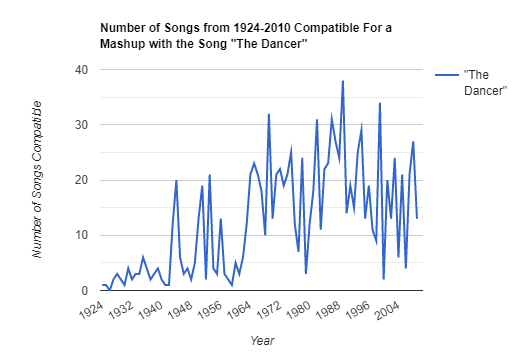

## Actual Output:
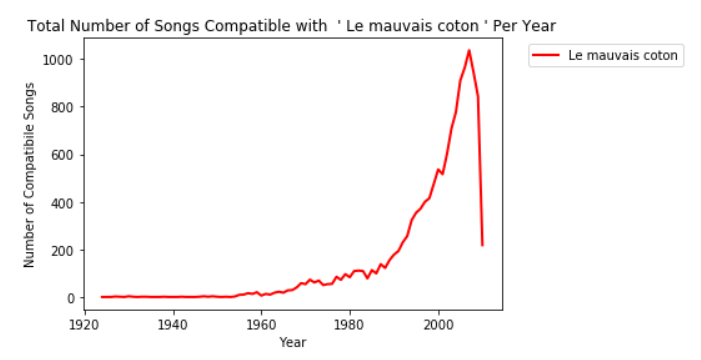
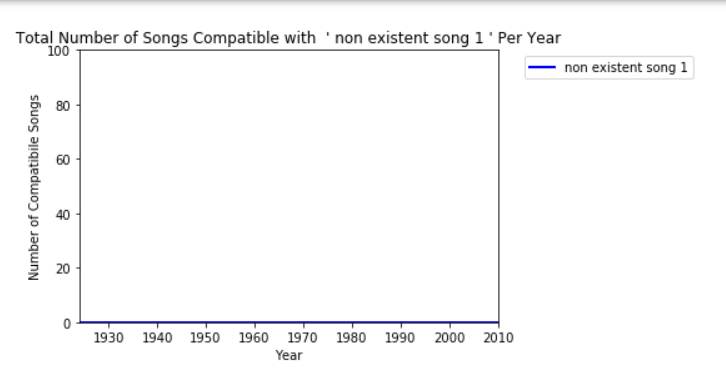

## Explain how you used what you learned about systematic program design to solve the problem. 

My project incorporates a lot of understanding from systematic programming methods which have the main focus on the data that we're handling rather than the programming language. My main goal was to produce programs with consistent structure that are easy to modify later by building tests which is an integral part of the programming process.

There are many crucial decisions I had to make along the way of designing my project.
- Choosing which data types I would be needed to define. I defined a compound a well as a list of compounds for my project. This is because each SongData consists of 3 properties- the title, the tempo and the year. A compound would be the only appropriate option as we dont have an exact number of songs that exist in this world. We just know that each SongData would definitely have the above mentioned properties. I used a list of the SongDatas because i would be handling a lot of Songs in my function and formulating them in the form of a list is the most efficient way to go about this so that an accumilator can be implemented and each song in the list can be dealt with individually in the loop.
- Choosing the correct what form of visualization  i.e. pie chart, bar chart, line graph or scatterplot, etc. I ended up choosing the line graph because it was the most appopriate option to show the variation over the years in the number of compatible song.

### Explaining the concepts taught in cpsc103:

- I implemented the HTDD recipe by creating a compound data type for SongData which consists of a song title, tempo and year

- I used the HTDF recipe to design all functions with every function having a signature, purpose, stub, template, main body and tests and examples. 

- I used the conventions of arbitrary-sized module by designing functions with accumulators and providing descriptions for them

- I implemented helper functions in order to simplify finding compatible songs in each year. Having smaller helper functions for the easiest of tasks helped in making everything organized and easy to carry out.

- The HTDAP recipe has been used in my project as I carried out steps 1a,b,c and 2a,b to help plan out exactly which data I would be requiring and working on to obtain an output

- The Module 8: Visualization helped me plot a line graph that showed me the number of compatible songs per year with the input song

## Discuss which part of the project was the most difficult for you and why.

### We had quite some difficulties during the project. Some of them are listed below:
- There was a confusion as to how we would deal with the graph when a song_title which doesn't exist in the list formed from the csv file is input. Here we had to make several more helper functions and take a condition in the main function which would check if the song actually exists in the csv file read by the read function. If it doesn't, plot_empty_graph would run, otherwise plot_compatible_songs_per_year would run

- Another problem we came across was dealing with the filtered list and counting the number of compatible songs for each year. I initially though of using nested loops to consider every year first and then the whole filtered list within comparing the year of every songdata in the list with the year being considered and appending the count of songs in another list. However, this method wouldn't have been effective. So, I incorporated 2 functions with further helper functions to break down the problem into smaller parts and make it easier to carry out.

- The third problem i came across was in the design and the visual aspects of the line graph which was getting plot. For this I had to place a limit on the x and y axis in the plot_empty_graph function 


## Provide examples of ways in which you could use your systematic programming design skills to solve problems in your chosen topic area in the future

This project can further be developed to obtain even more information. Rather than just showing the variation in the number of compatible songs over the years, I can further make use of functions and systematic programming design skills to show the variation as well as return the songs which are compatible. There are endless possibilities to this code and one of them could be this. The fact that this can be used by music producers to make their task easier is amazing.